# Visualize Predictions

## Parameters

In [7]:
config = '/home/Thomas/ABC_expeditions_classifier/configs/exp_resnet18.yaml'
split = 'train' # options are "train", "test", and "none"

## Load Data

In [8]:
import yaml

from ct_classifier.train import create_dataloader, load_model       # NOTE: since we're using these functions across files, it could make sense to put them in e.g. a "util.py" script.

# load config
print(f'Using config "{config}"')
cfg = yaml.safe_load(open(config, 'r'))

# setup entities
dl_test = create_dataloader(cfg, split=split)

# load model
model = load_model(cfg)

Using config "/home/Thomas/ABC_expeditions_classifier/configs/exp_resnet18.yaml"
Starting new model


/home/Thomas/miniconda3/envs/ABC_expeditions_classifier/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/Thomas/miniconda3/envs/ABC_expeditions_classifier/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [9]:
len(dl_test.dataset.data)

17908

In [4]:
batch = next(iter(dl_test))


## Visualize

This is up to you to figure out now. :)

#### 1. Trying to plot an image

In [8]:
# Get the shape of the tensor
batch[0].shape

    # The shape is 
    #   128 (the number of images in the batch)
    #   3 (the RGB color channels)
    #   224 (the x coordinates)
    #   224 (the y coordinates)

# The labels of the tensor are located in the second element of the tensor

batch[1]

    # The shape is 128 (128 classes, one per image in the tensor)

# To plot the image, we need to:

    # 1. Grab the first image in tensor

img_1 = batch[0][0]

img_1.shape

    # The shape of image 1 is:

        # 3 (the RGB channels)
        # 224 (the x)
        # 224 (the y)

    # We need to change the order so the RGB channels come last in the sequence (see next code chunk)

torch.Size([3, 224, 224])

In [9]:
# In this code chunk, we will change the order of the image

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw, ImageFont

# Images are traditionally plotted from numpy arrays, not tensors

    # 1. Convert the tensor to a NumPy array

numpy_array_img_1 = batch[0][0].detach().numpy()
numpy_array_img_1=np.transpose(numpy_array_img_1, (1, 2, 0))

    # The transpose step inverts the order of the numpy array, so the color channels come last'

# In the next code section, we will plot the image using PIL



In [10]:
numpy_array_img_1

array([[[0.33333334, 0.33333334, 0.33333334],
        [0.33333334, 0.33333334, 0.33333334],
        [0.3254902 , 0.3254902 , 0.3254902 ],
        ...,
        [0.39215687, 0.39215687, 0.39215687],
        [0.3647059 , 0.3647059 , 0.3647059 ],
        [0.39215687, 0.39215687, 0.39215687]],

       [[0.33333334, 0.33333334, 0.33333334],
        [0.3254902 , 0.3254902 , 0.3254902 ],
        [0.33333334, 0.33333334, 0.33333334],
        ...,
        [0.4392157 , 0.4392157 , 0.4392157 ],
        [0.41568628, 0.41568628, 0.41568628],
        [0.36862746, 0.36862746, 0.36862746]],

       [[0.3254902 , 0.3254902 , 0.3254902 ],
        [0.32941177, 0.32941177, 0.32941177],
        [0.32941177, 0.32941177, 0.32941177],
        ...,
        [0.42745098, 0.42745098, 0.42745098],
        [0.42352942, 0.42352942, 0.42352942],
        [0.40784314, 0.40784314, 0.40784314]],

       ...,

       [[0.24705882, 0.23921569, 0.2509804 ],
        [0.2509804 , 0.24313726, 0.25490198],
        [0.27058825, 0

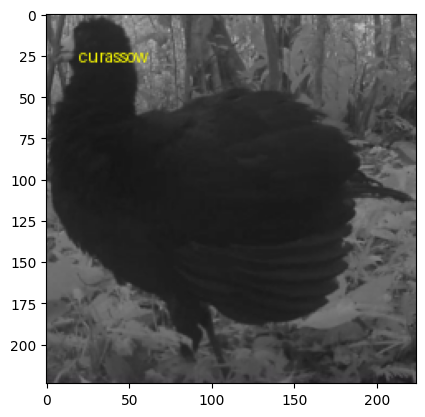

In [11]:
# To plot the image, we need to

    # Convert the image RGB values from floats to integers by
        # Multiplying by 255
        # Converting the floats to integers

image = Image.fromarray((255*numpy_array_img_1).astype(np.uint8))

draw  = ImageDraw.Draw(image)
#font  = ImageFont.truetype("arial.ttf", 20, encoding="unic")
draw.text((20,20), 
          dl_test.dataset.inv_labels.get(batch[1][0].item()), 
          fill="#FFFF00")

plt.imshow(image)

In [5]:
# Load the libraries

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw, ImageFont

# Definitions

def show_batch_image(batch, index):

    # 1. Grab the image at the right index and convert to numpy array
    
    numpy_array_img = batch[0][index].detach().numpy()
    numpy_array_img=np.transpose(numpy_array_img, (1, 2, 0))

    # 2. Plot image with label 

    image = Image.fromarray((255*numpy_array_img).astype(np.uint8))
    draw  = ImageDraw.Draw(image)
    draw.text((20,20), 
          dl_test.dataset.inv_labels.get(batch[1][index].item()), 
          fill="#FFFF00")
    
    plt.imshow(image)



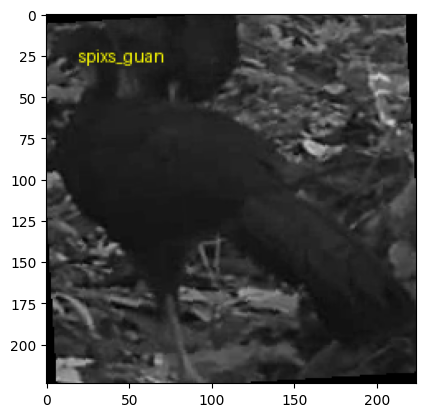

In [14]:
show_batch_image(batch=batch, index = 55)

# Feed data into model

In [15]:
model_instance, start_epoch = load_model(cfg = cfg)

start_epoch

predictions = model_instance(batch[0])


/home/Thomas/miniconda3/envs/ABC_expeditions_classifier/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/Thomas/miniconda3/envs/ABC_expeditions_classifier/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Starting new model


In [16]:
predictions.shape

torch.Size([128, 31])